# Lab 1:  Data inspection and evaluation tools

### Objective

In this programming assignment you will

- explore some programming concepts in Python and SciKitLearn to implement k-Means clustering and a k-NN classifier,
- get acquainted with the simplified version of the MNIST dataset provided in SciKitLearn and
- apply tools for data set inspection and analysis, both "manual / visual" and through the use of UMAP (a projection / dimensionality reduction tool), 
- investigate the use of evaluation tools provided in SciKitLearn for the two approaches you implemented.
This assignment is also the basis for Homework assignment (report) 1.

### Background and Tools
There are two algorithms with similar names, which makes them prone to confusion although they have different purposes and follow different learning paradigms. One is in fact a clustering algorithm, k-Means, which in an unsupervised manner finds k clusters in a data set. This is done by iteratively setting out / moving k cluster centers and grouping the points in the set closest into the cluster, while at the same time optimising the separation between the groups (clusters) of data points. The other is a classifier, k-NN, which in its basic conceptual form does not actually do anything to fit a model to the given data, it simply finds the k nearest neighbours in the entire data set to an unseen data point, given some distance measure, and assigns it the class of the majority of the k samples. In actual implementations, other techniques are used to structure the data somewhat, so that the search for the closest points only has to be carried out in a part of the data set. However, it can be called supervised, as it is given the class labels of the data points it works with to do this pre-processing.

You will in this assignment work with a simplified version of the MNIST handwritten numbers dataset provided by SciKitLearn (sklearn.datasets.digits) and inspect and modify it with UMAP, calculate the cosine similarity of each data sample against the means over the different classes, and later both cluster it with k-Means as well as use the k-NN classifier on it, to then run different evaluation tools. The idea is to have used UMAP (as one example of a tool for dimensionality reduction), done a matrix multiplication in Python / Numpy, understand the different elements of the SciKitLearn confusion matrix and evaluation reports, as well as to see what you can do to evaluate a clustering approach (which is not as naturally done as for a classification, where an answer is either wrong or correct). 

### Instructions
To pass the assignment, you need to
- provide an implementation that follows the instructions below and produces results / output similar to that given in the checklist, and
- discuss your implementation / your observations with another Lab group (get evidence from the others of the discussion), making sure you can answer all points in the check list, before you
- discuss it with a TA or teacher for final approval in the lab session (both of you need to be able to answer any questions about your solution). 

### Task

In [20]:
# Load modules
from sklearn import datasets
import matplotlib.pyplot as plt 
import numpy as np
import umap.umap_ as umap

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [89]:
# Writing code here
digits = datasets.load_digits()
data = digits.data

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


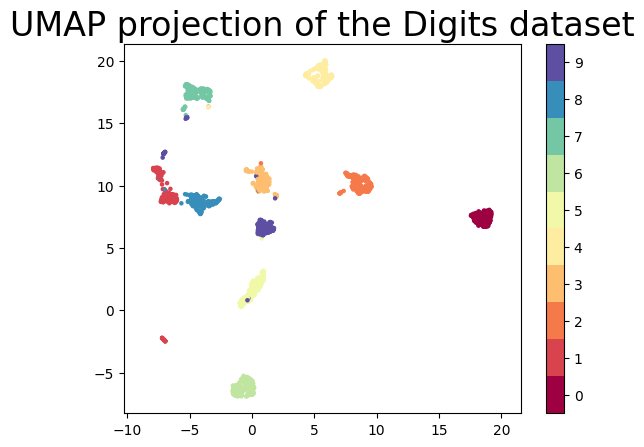

In [90]:
# Writing code here 
# Train and fit a UMAP-reducer and use it to transform the digits dataset into embeddings.
# UMAP is an algorithm for dimension reduction technique to reduce dimension of a dataset. Many datasets 
# might have high number of features or dimensions, which can make it challenging to visualize and analyze the data.  

# The default dimension reduction of UMAP is 2.
reducer = umap.UMAP(random_state=42)
reducer.fit(data)
embedding = reducer.transform(data)

# We then visualize using scatter plot
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)

# set the scaling
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [139]:
mean_imgs = np.array([data[digits.target==i].mean(axis=0) for i in range(10)])


In [93]:
from numpy import linalg
mean_norms = [linalg.norm(image) for image in mean_imgs] 
raw_norms = [linalg.norm(image) for image in data]

In [140]:
import math 

def cosine_similarity(vec1, vec2, norm1, norm2):
    dot_product = sum([x * y for x, y in zip(vec1, vec2)])

    if norm1 == 0 or norm2 == 0:
        return 0

    return dot_product / (norm1 * norm2)


num_samples = len(mean_imgs)
similarities = np.zeros((num_samples, num_samples))

for i in range(num_samples):
    for j in range(num_samples):
        similarities[i][j] = cosine_similarity(data[i], mean_imgs[j], raw_norms[i], mean_norms[j])

# Configure the printing format
np.set_printoptions(precision=3, suppress=True)

# Print the cosine similarity matrix
print(cosine_sim_matrix)

[[0.97  0.641 0.69  0.746 0.737 0.778 0.73  0.695 0.78  0.827]
 [0.614 0.96  0.805 0.764 0.809 0.763 0.744 0.78  0.854 0.738]
 [0.71  0.874 0.826 0.735 0.763 0.67  0.765 0.78  0.86  0.729]
 [0.686 0.785 0.819 0.917 0.621 0.779 0.722 0.655 0.792 0.832]
 [0.673 0.755 0.559 0.576 0.871 0.609 0.751 0.618 0.693 0.618]
 [0.782 0.83  0.791 0.889 0.709 0.806 0.725 0.69  0.836 0.912]
 [0.768 0.845 0.768 0.677 0.841 0.773 0.936 0.657 0.83  0.691]
 [0.544 0.709 0.669 0.668 0.643 0.709 0.554 0.891 0.751 0.677]
 [0.79  0.831 0.841 0.853 0.747 0.784 0.806 0.78  0.931 0.852]
 [0.8   0.773 0.747 0.809 0.749 0.799 0.739 0.746 0.821 0.879]]


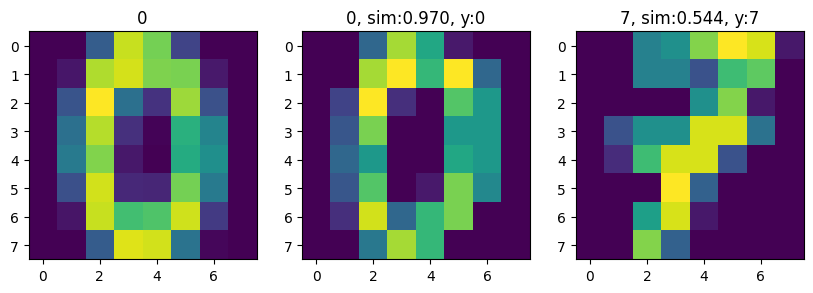

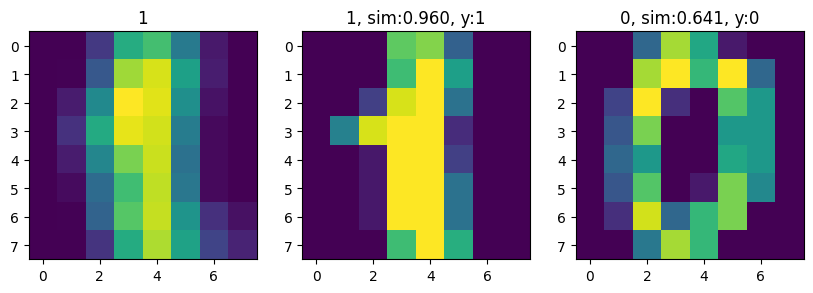

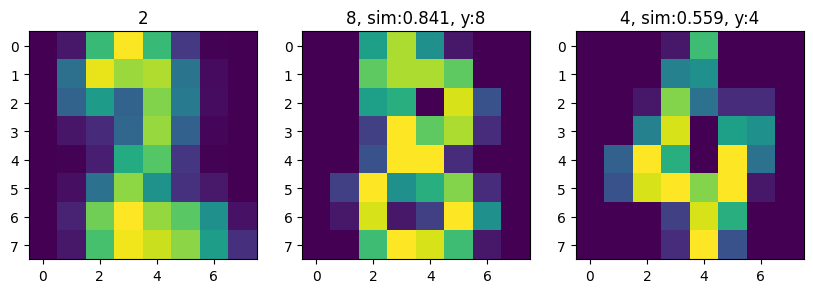

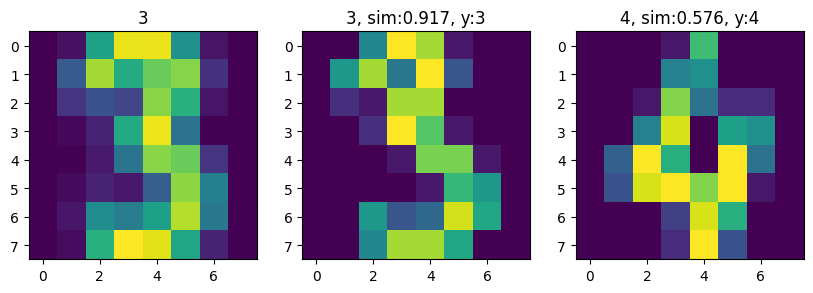

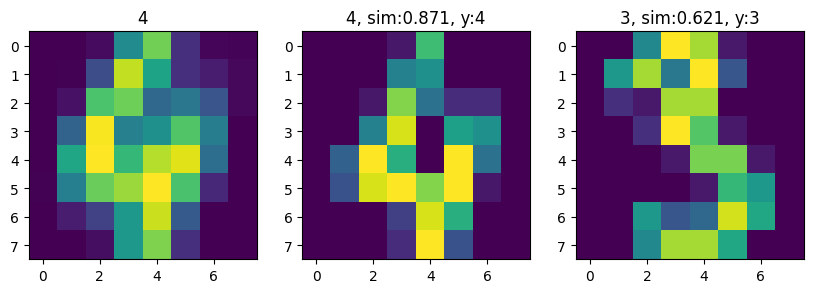

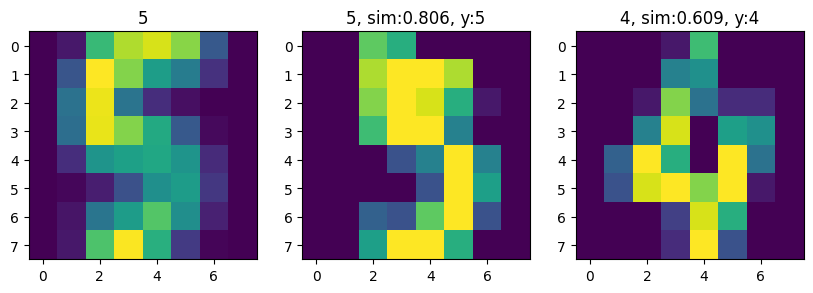

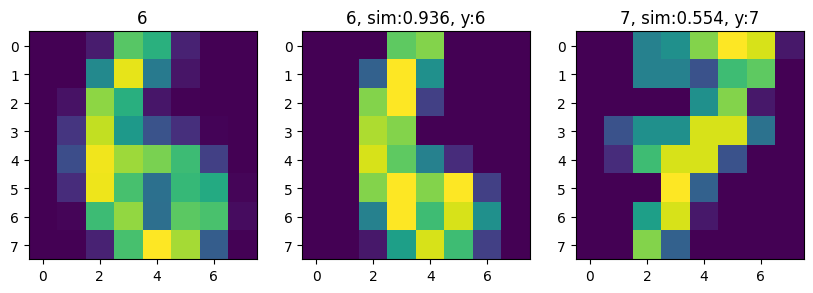

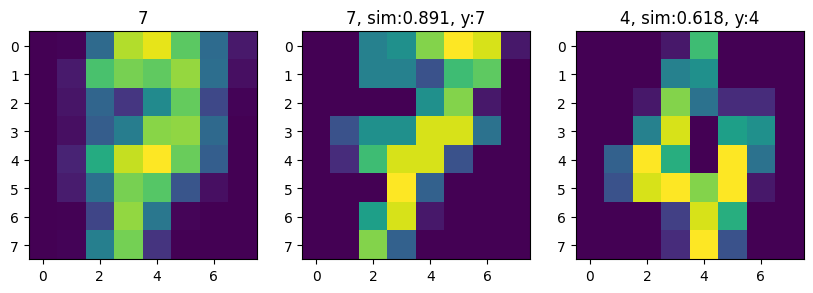

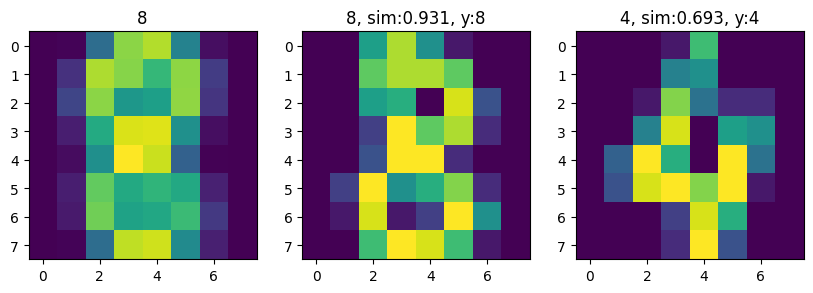

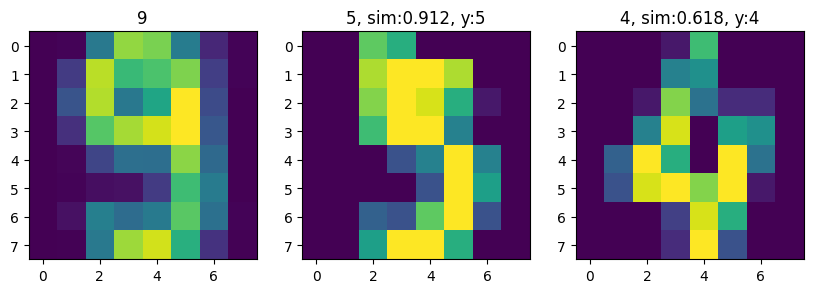

In [106]:
for i in range(0, 10):
    min_idx = np.argmin(similarities[:,i])
    max_idx = np.argmax(similarities[:,i])

    fig, axs = plt.subplots(1,3,figsize=(10,10))
    
    # reference image
    axs[0].set_title(f"{i}")        
    axs[0].imshow(mean_imgs[i].reshape(8,8))
    
    # image and data with highest similarity to reference
    axs[1].set_title(f"{max_idx}, sim:{cosine_sim_matrix[max_idx, i]:.3f}, y:{digits.target[max_idx]}")
    axs[1].imshow(data[max_idx].reshape(8, 8))
    
    # image and data with lowest similarity to reference
    axs[2].set_title(f"{min_idx}, sim:{cosine_sim_matrix[min_idx, i]:.3f}, y:{digits.target[min_idx]}")
    axs[2].imshow(data[min_idx].reshape(8, 8))

plt.show()

# Split Training and Test Data

5. Split your data set into 70% training data (features and labels), and 30% test data.

In [53]:
data_len = len(digits.data)
split = int(0.7*data_len)

train_features = digits.data[:split]
train_labels = digits.target[:split]

test_features = digits.data[split:]
test_labels = digits.target[split:]

print("Number of training examples: ",len(train_features))
print("Number of test examples: ",len(test_features))
print("Number of total examples:", len(train_features)+len(test_features))


Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


# K Nearest Neighbor

6. Process the data with a k-NN classifier as follows:

Set up a sklearn.neighbors.KNeighborsClassifier as it comes in SciKitLearn with n_neighbors = 5, algorithm = 'brute' and otherwise default parameters

In [54]:

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, algorithm='brute')

In [98]:
classifier.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='brute')

In [56]:
predicted_labels = classifier.predict(test_features)

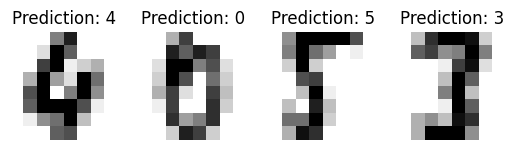

In [107]:
images_and_predictions = list(zip(digits.images[split:], predicted_labels))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [199]:
distances, neighbors = classifier.kneighbors(test_features) 
distances_and_neighbors = list(zip(distances, neighbors))

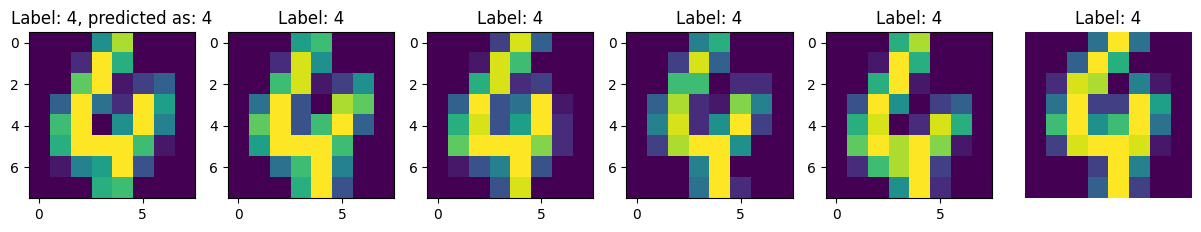

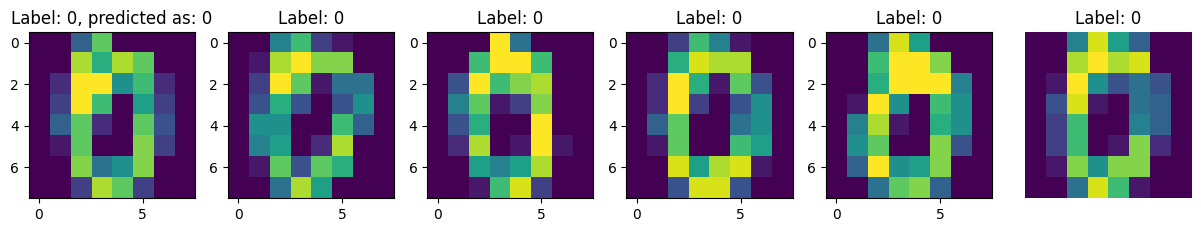

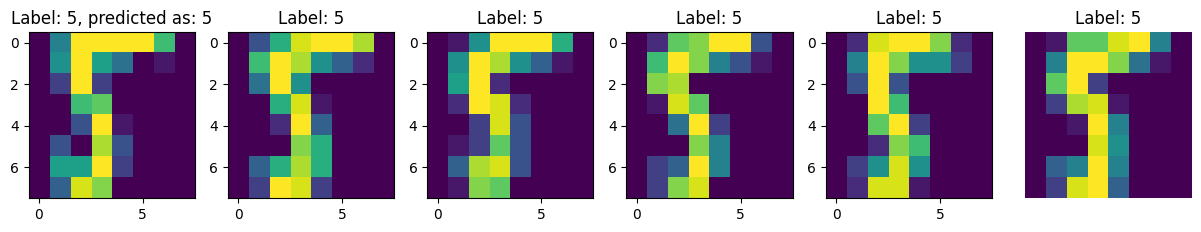

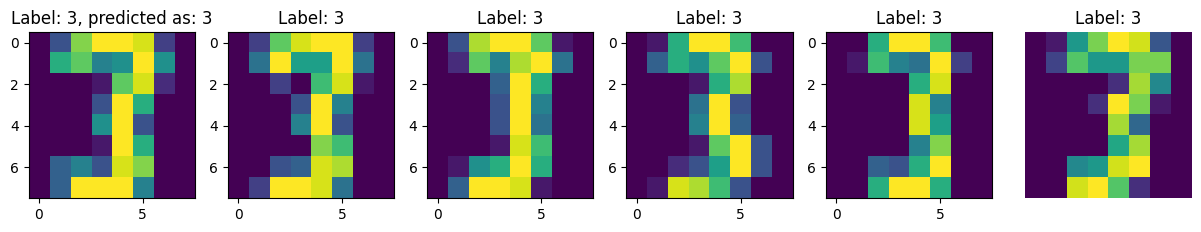

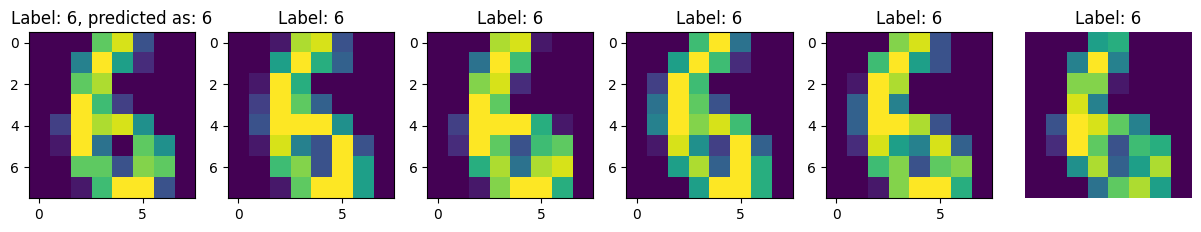

In [200]:
# Create a list of (distance, neighbors) pairs
distances_and_neighbors = list(zip(distances, neighbors))

nbr_to_display = 5

# Create subplots to display distances and neighbors
for index, (distance, neighbor) in enumerate(distances_and_neighbors[:nbr_to_display]):
    fig, axs = plt.subplots(1, nbr_to_display+1, figsize=(15,5))
    plt.axis('off')

    # Reference
    axs[0].set_title(f"Label: {test_labels[index]}, predicted as: {predicted_labels[index]}")   
    axs[0].imshow(test_features[index].reshape(8,8))

    #5 Nearest
    for j in range(nbr_to_display):
        axs[j+1].set_title(f"Label: {train_labels[neighbors[index,j]]}")
        axs[j+1].imshow(train_features[neighbors[index,j]].reshape(8,8))

plt.show()

In [196]:
print(metrics.classification_report( test_labels, predicted_labels))
print(metrics.confusion_matrix( test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  0  0 55  0  0  1  1  0]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0

# K Means Clustering

Set up a k-Means instance (sklearn.cluster.KMeans) with n_clusters=10, default parameters otherwise.

In [157]:
from sklearn.cluster import KMeans
#Model
clustering = KMeans(n_clusters=10)
#Fit the model to training features
clusters = clustering.fit(train_features)
#Preict clusters using test data
predicted_clusters = clusters.predict(test_features)

C:\Users\patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualise the found cluster centers (you can get them using <clustering>.cluster_centers_); those are in principle also images, but maybe not as clearly interpretable as you would have hoped for. Compare what you see with the scatter plot you got from UMAP, i.e. find k-Means-clusters (visualised as cluster center images) and corresponding UMAP-plot-clusters (visualised as blobs or scattered dots in the plot) that are clearly distinct from everything else or others that seem to be "all the same" or at least very close.

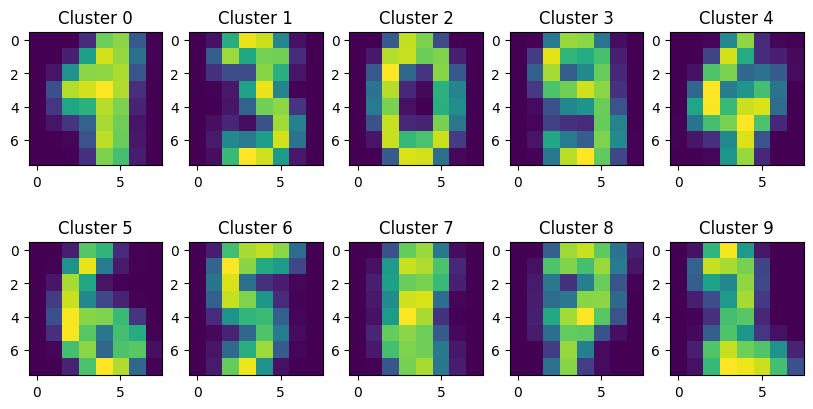

In [181]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axs.flat):
    ax.imshow(clusters.cluster_centers_[i].reshape(8, 8))
    ax.set_title(f"Cluster {i}")

plt.show()

In [197]:
print(metrics.classification_report(test_labels, predicted_clusters))
print(metrics.confusion_matrix(test_labels, predicted_clusters))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        53
           2       0.02      0.02      0.02        53
           3       0.01      0.02      0.02        53
           4       0.96      0.91      0.94        57
           5       0.02      0.02      0.02        56
           6       0.00      0.00      0.00        54
           7       0.04      0.06      0.05        54
           8       0.05      0.06      0.05        52
           9       0.00      0.00      0.00        55

    accuracy                           0.11       540
   macro avg       0.11      0.11      0.11       540
weighted avg       0.12      0.11      0.11       540

[[ 0  0 52  0  1  0  0  0  0  0]
 [17  0  0  0  0  0  1 35  0  0]
 [ 0  7  1  3  0  0  0  1  0 41]
 [ 0 41  0  1  0  0  2  6  3  0]
 [ 1  0  1  0 52  0  0  1  2  0]
 [ 0  0  0 18  1  1 36  0  0  0]
 [ 1  0  0  0  0 53  0  0  0  0]
 [ 0  0  0

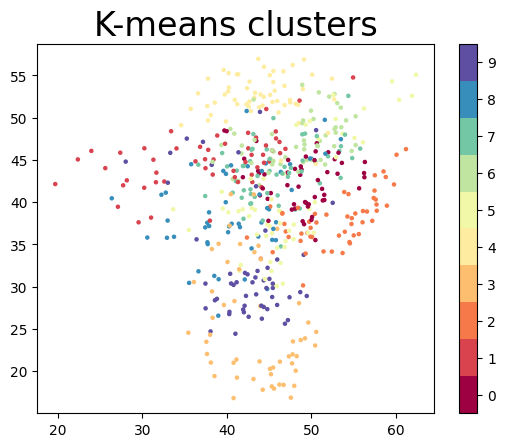

In [188]:
#UMAP-plot-clusters - scattered plots
embedding2 = clustering.transform(test_features)

plt.scatter(embedding2[:, 0], embedding2[:, 1], c=test_labels, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('K-means clusters', fontsize=24);

plt.show()

In [208]:
print(f"Homogeneity: {metrics.homogeneity_score(test_labels, kmeans_prediction)}")
print(f"Completeness: {metrics.completeness_score(test_labels, kmeans_prediction)}")

Homogeneity: 0.7346937338184011
Completeness: 0.7472341506235038


In [211]:
print(f"Adjusted mutual information score: {metrics.adjusted_mutual_info_score(test_labels, kmeans_prediction)}")

# The Adjusted Mutual Information (AMI) score is a metric used to measure the similarity between two sets of labels or clusterings, 
# such as ground truth labels and predicted cluster assignments. It quantifies how well the clusters obtained from a clustering algorithm
# match the true labels, while correcting for random chance.

# An AMI score close to 1 indicates strong agreement between the true labels and the predicted clusters.
# An AMI score around 0 suggests that the predicted clusters are no better than random.

Adjusted mutual information score: 0.7315978628861917
